**Machine Learning Project**

In [227]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

**Importing a csv dataset**

In [228]:
dataframe = pd.read_csv(r"C:\Users\Mero Computer\OneDrive\Desktop\counterfeit_transactions.csv") 

**Showing top 10 dataset of the file**

In [229]:
dataframe.head(10)

,transaction_id,customer_id,transaction_date,customer_age,customer_location,quantity,unit_price,total_amount,payment_method,shipping_speed,customer_history_orders,discount_applied,discount_percentage,shipping_cost,delivery_time_days,refund_requested,velocity_flag,geolocation_mismatch,device_fingerprint_new,involves_counterfeit
0,TXN_957334,CUST_11907,2024-10-12 03:52:13,22,JP,1,199.66,199.66,Debit Card,Express,17,False,0.0,5.39,26,False,False,False,False,False
1,TXN_246397,CUST_27641,2024-08-18 00:36:57,62,DE,4,116.01,464.03,PayPal,Express,36,False,0.0,8.18,25,False,False,False,False,False
2,TXN_403072,CUST_78628,2024-08-19 22:21:30,75,DE,1,42.04,42.04,Credit Card,Priority,21,False,0.0,8.61,27,False,False,False,False,False
3,TXN_848560,CUST_98579,2025-04-16 18:49:39,56,BR,3,147.69,443.08,Credit Card,Standard,14,True,48.7,17.00,26,False,False,False,False,False
4,TXN_270817,CUST_67519,2024-10-06 13:30:52,19,IN,4,40.70,162.80,PayPal,Priority,48,False,0.0,20.53,1,False,False,True,False,False
5,TXN_235574,CUST_76740,2024-07-14 20:02:30,30,IN,3,298.04,894.11,Debit Card,Express,46,True,40.5,17.06,4,False,False,False,False,False
6,TXN_539896,CUST_25980,2025-03-22 14:34:20,67,US,1,52.95,52.95,PayPal,Express,38,True,30.4,8.19,15,False,False,False,False,False
7,TXN_831689,CUST_71988,2024-09-28 05:25:30,25,IN,1,81.40,81.40,Credit Card,Express,16,True,39.0,12.74,14,False,False,False,False,False
8,TXN_743257,CUST_72363,2024-09-27 13:10:51,66,US,1,79.57,79.57,PayPal,Standard,24,False,0.0,7.93,13,False,False,False,False,False
9,TXN_379872,CUST_86291,2024-10-31 01:46:18,78,IN,1,193.72,193.72,PayPal,Standard,19,True,27.6,21.37,19,False,False,False,False,False


**Showing total cloumn name**

In [230]:
col_list = dataframe.columns.tolist()
print(col_list)

['transaction_id', 'customer_id', 'transaction_date', 'customer_age', 'customer_location', 'quantity', 'unit_price', 'total_amount', 'payment_method', 'shipping_speed', 'customer_history_orders', 'discount_applied', 'discount_percentage', 'shipping_cost', 'delivery_time_days', 'refund_requested', 'velocity_flag', 'geolocation_mismatch', 'device_fingerprint_new', 'involves_counterfeit']


**Checking null value available or not**

In [231]:
print(dataframe.isnull())

      transaction_id  customer_id  transaction_date  customer_age  \
0              False        False             False         False   
1              False        False             False         False   
2              False        False             False         False   
3              False        False             False         False   
4              False        False             False         False   
...              ...          ...               ...           ...   
2995           False        False             False         False   
2996           False        False             False         False   
2997           False        False             False         False   
2998           False        False             False         False   
2999           False        False             False         False   

      customer_location  quantity  unit_price  total_amount  payment_method  \
0                 False     False       False         False           False   
1            

**Filling zero in null value**

In [232]:
dataframe = dataframe.fillna(0)
print(dataframe.head(10))

  transaction_id customer_id     transaction_date  customer_age  \
0     TXN_957334  CUST_11907  2024-10-12 03:52:13            22   
1     TXN_246397  CUST_27641  2024-08-18 00:36:57            62   
2     TXN_403072  CUST_78628  2024-08-19 22:21:30            75   
3     TXN_848560  CUST_98579  2025-04-16 18:49:39            56   
4     TXN_270817  CUST_67519  2024-10-06 13:30:52            19   
5     TXN_235574  CUST_76740  2024-07-14 20:02:30            30   
6     TXN_539896  CUST_25980  2025-03-22 14:34:20            67   
7     TXN_831689  CUST_71988  2024-09-28 05:25:30            25   
8     TXN_743257  CUST_72363  2024-09-27 13:10:51            66   
9     TXN_379872  CUST_86291  2024-10-31 01:46:18            78   

  customer_location  quantity  unit_price  total_amount payment_method  \
0                JP         1      199.66        199.66     Debit Card   
1                DE         4      116.01        464.03         PayPal   
2                DE         1       42.0

**Removing unwanted column from dataset**

In [117]:
df = dataframe.drop(["transaction_id", "customer_id", "transaction_date"], axis=1)
print(df.head(10))

   customer_age customer_location  quantity  unit_price  total_amount  \
0            22                JP         1      199.66        199.66   
1            62                DE         4      116.01        464.03   
2            75                DE         1       42.04         42.04   
3            56                BR         3      147.69        443.08   
4            19                IN         4       40.70        162.80   
5            30                IN         3      298.04        894.11   
6            67                US         1       52.95         52.95   
7            25                IN         1       81.40         81.40   
8            66                US         1       79.57         79.57   
9            78                IN         1      193.72        193.72   

  payment_method shipping_speed  customer_history_orders  discount_applied  \
0     Debit Card        Express                       17             False   
1         PayPal        Express         

**Data modeling for discount percentage customer is asking for**

In [236]:
new_columns = ['total_amount', 'discount_percentage']
# selecting a 20 percentage discount for data modeling
new_df['result'] = (new_df['discount_percentage'] < 20).astype(int)
print(new_df.head(10))
# 0 values indicate a fraud and 1 values indicate genuine

   total_amount  discount_percentage  result
0        199.66                  0.0       1
1        464.03                  0.0       1
2         42.04                  0.0       1
3        443.08                 48.7       0
4        162.80                  0.0       1
5        894.11                 40.5       0
6         52.95                 30.4       0
7         81.40                 39.0       0
8         79.57                  0.0       1
9        193.72                 27.6       0


**Feature,Target & Shape**

In [234]:
x=new_df[['total_amount']]
y=new_df[['discount_percentage']]
z=new_df[['result']]
print(f"x shape: {x.shape}, y shape: {y.shape}, z shape: {z.shape}")

x shape: (3000, 1), y shape: (3000, 1), z shape: (3000, 1)


**Cleaning the Data for ValueError**

In [235]:
x = x.dropna()
y = y.dropna()

In [149]:
print("NaN values in x:", x.isnull().sum().sum())
print("NaN values in y:", y.isnull().sum().sum())


NaN values in x: 0
NaN values in y: 0


**Checking Datatypes**

In [237]:
print("x dtypes:\n", x.dtypes)
print("y dtype:", y.dtypes)

x dtypes:
 total_amount    float64
dtype: object
y dtype: discount_percentage    float64
dtype: object


**Logistic Regression Model**

C:\Users\Mero Computer\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Mero Computer\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Mero Computer\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Mero Computer\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Probability of Fraud (20%): 0.52721880902894
Predicted Class: [1]


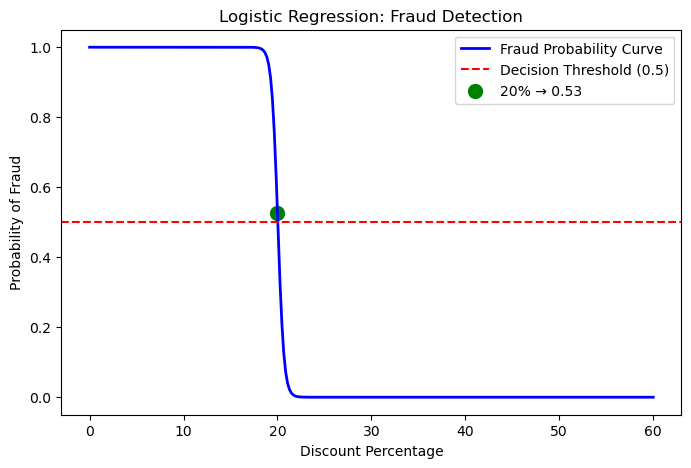

In [257]:
model = LogisticRegression()
model.fit(y,z)
probability = model.predict_proba([[20]])[0][1]
prediction = model.predict([[20]])
#prediction for 20 percentage
print("Probability of Fraud (20%):", probability)
print("Predicted Class:", prediction)
x_range = np.linspace(0, 60, 300).reshape(-1, 1)
y_prob = model.predict_proba(x_range)[:, 1]

# Plot sigmoid curve
plt.figure(figsize=(8,5))
plt.plot(x_range, y_prob, color="blue", linewidth=2, label="Fraud Probability Curve")

# Plot threshold line (0.5)
plt.axhline(0.5, color="red", linestyle="--", label="Decision Threshold (0.5)")

# Plot the prediction point for 20%
plt.scatter(20, probability, color="green", s=100, label=f"20% → {round(probability,2)}")

# Labels & Title
plt.xlabel("Discount Percentage")
plt.ylabel("Probability of Fraud")
plt.title("Logistic Regression: Fraud Detection")
plt.legend()
plt.show()

**Decision Tree**

C:\Users\Mero Computer\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Mero Computer\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Decision Tree Prediction (20%): 1.0
Decision Tree Prediction (20%): [1]


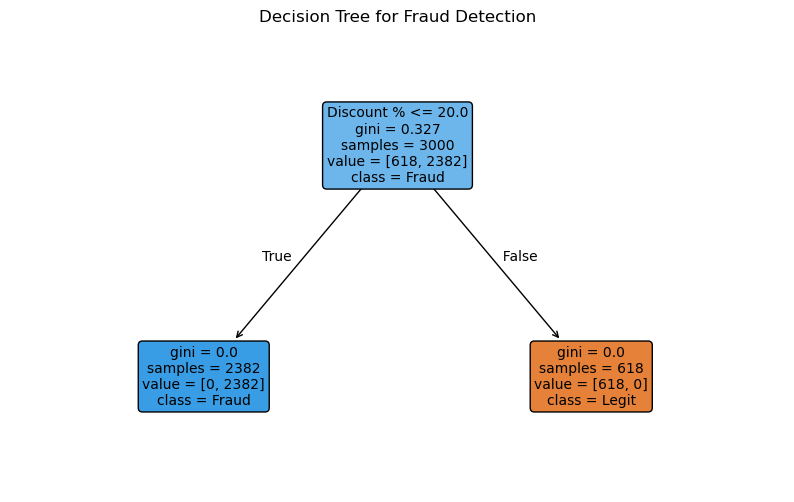

In [239]:
model_dt = DecisionTreeClassifier(max_depth=3, random_state=42)
model_dt.fit(y,z)
#predict for 20 percentage
probability_dt = model_dt.predict_proba([[20]])[0][1]
prediction_dt = model_dt.predict([[20]])
print("Decision Tree Prediction (20%):", probability_dt)
print("Decision Tree Prediction (20%):", prediction_dt)
plt.figure(figsize=(10,6))
plot_tree(model_dt, feature_names=["Discount %"], class_names=["Legit", "Fraud"],
          filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree for Fraud Detection")
plt.show()

**Random Forest Model**

C:\Users\Mero Computer\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Mero Computer\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Mero Computer\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Mero Computer\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Probability of Fraud (20%): 0.9
Random Forest Prediction (20%): [1]


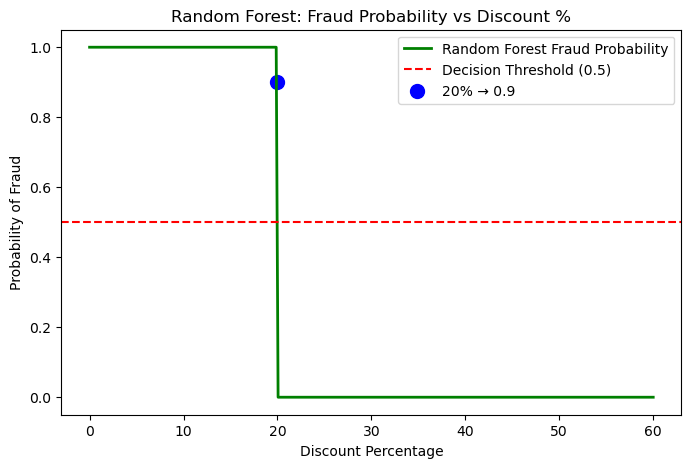

In [240]:
model_rf = RandomForestClassifier(n_estimators=10, random_state=42)
model_rf.fit(y, z)

# Predict for 20 Percentage
probability_rf = model_rf.predict_proba([[20]])[0][1]
prediction_rf = model_rf.predict([[20]])
print("Probability of Fraud (20%):", probability_rf)
print("Random Forest Prediction (20%):", prediction_rf)
x_range = np.linspace(0, 60, 300).reshape(-1, 1)
y_prob = model_rf.predict_proba(x_range)[:, 1]
plt.figure(figsize=(8,5))
plt.plot(x_range, y_prob, color="green", linewidth=2, label="Random Forest Fraud Probability")
plt.axhline(0.5, color="red", linestyle="--", label="Decision Threshold (0.5)")
plt.scatter(20, probability_rf, color="blue", s=100, label=f"20% → {round(probability_rf,2)}")
plt.xlabel("Discount Percentage")
plt.ylabel("Probability of Fraud")
plt.title("Random Forest: Fraud Probability vs Discount %")
plt.legend()
plt.show()

**KNN Model**

C:\Users\Mero Computer\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Mero Computer\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Mero Computer\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Mero Computer\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Probability of Fraud (20%): 1.0
KNN Prediction (20%): [1]


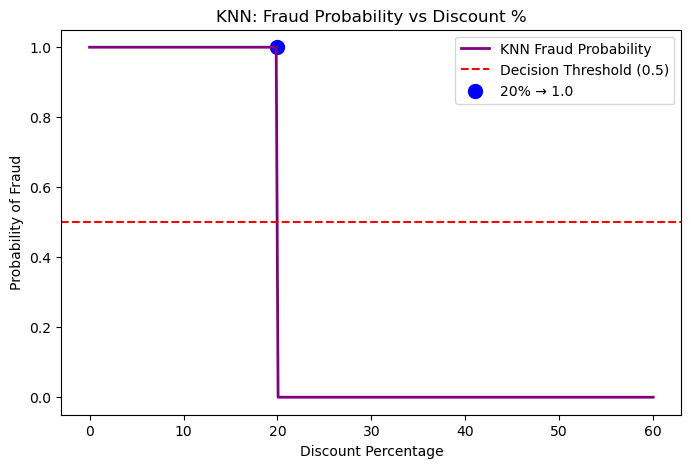

In [241]:
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(y, z)

# Predict for 20 Percentage
probability_knn = model_knn.predict_proba([[20]])[0][1]
prediction_knn = model_knn.predict([[20]])
print("Probability of Fraud (20%):", probability_knn)
print("KNN Prediction (20%):", prediction_knn)
x_range = np.linspace(0, 60, 300).reshape(-1, 1)
y_prob = model_knn.predict_proba(x_range)[:, 1]

# Plot KNN probability curve (step-like)
plt.figure(figsize=(8,5))
plt.plot(x_range, y_prob, color="purple", linewidth=2, label="KNN Fraud Probability")

# Plot threshold line (0.5)
plt.axhline(0.5, color="red", linestyle="--", label="Decision Threshold (0.5)")

# Plot prediction for 20% discount
plt.scatter(20, probability_knn, color="blue", s=100, label=f"20% → {round(probability_knn,2)}")

# Labels & Title
plt.xlabel("Discount Percentage")
plt.ylabel("Probability of Fraud")
plt.title("KNN: Fraud Probability vs Discount %")
plt.legend()
plt.show()

**Scatter Plot of Fraud Detection**

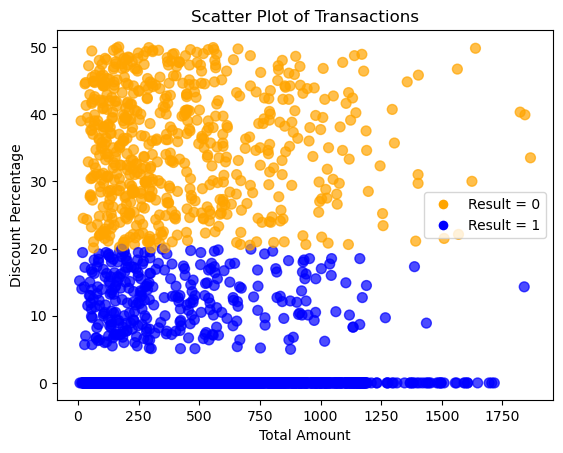

In [242]:
colors = new_df["result"].map({0: "orange", 1: "blue"})
plt.scatter(new_df["total_amount"], new_df["discount_percentage"], c=colors, s=50, alpha=0.7)
plt.xlabel("Total Amount")
plt.ylabel("Discount Percentage")
plt.title("Scatter Plot of Transactions")
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=8, label='Result = 0'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=8, label='Result = 1')
])
plt.show()

**Bar Graph of Fraud and Legit**

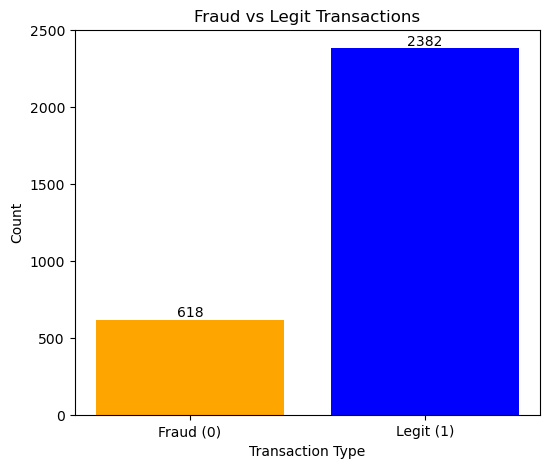

In [225]:
counts = new_df["result"].value_counts().sort_index()

# Bar plot
plt.figure(figsize=(6,5))
bars = plt.bar(counts.index, counts.values, color=["orange", "blue"])

# Labels
plt.xticks([0,1], ["Fraud (0)", "Legit (1)"])
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.title("Fraud vs Legit Transactions")

# Show values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, int(yval), ha='center', va='bottom')

plt.show()

**Data Modeling for Higher or Lower Age of Customer**

In [249]:
age_df = df[['customer_age', 'customer_history_orders']].copy()
# selecting a above 18 or below 65 age of customer for data modeling
age_df['age_result'] = ((age_df['customer_age'] > 18) & (age_df['customer_age'] < 65)).astype(int)
print(age_df.head(10))
# 0 values indicate a fraud and 1 values indicate genuine

   customer_age  customer_history_orders  age_result
0            22                       17           1
1            62                       36           1
2            75                       21           0
3            56                       14           1
4            19                       48           1
5            30                       46           1
6            67                       38           0
7            25                       16           1
8            66                       24           0
9            78                       19           0


**Logistic Regression Lower & Higer Age**

In [ ]:
x=new_df[['total_amount']]
y=new_df[['discount_percentage']]
z=new_df[['result']]
print(f"x shape: {x.shape}, y shape: {y.shape}, z shape: {z.shape}")